In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import multiprocessing
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
cores = multiprocessing.cpu_count()
os.listdir()

['opencv-text-detection.zip',
 '.ipynb_checkpoints',
 'accepted_projects',
 'Andrew W. Trask - Grokking Deep Learning-Manning Publications (2019).pdf',
 'Collective_Dataset',
 'corpus',
 'corpus.zip',
 'doc2vec.ipynb',
 'doc2vec_with_kfold.html',
 'doc2vec_with_kfold.ipynb',
 'Final Slides and Books',
 'google-play-store-apps',
 'google-play-store-apps.zip',
 'helpline-of-all-sorts',
 'helpline-of-all-sorts.zip',
 'kmeans_clustering.html',
 'kmeans_clustering.ipynb',
 'labels.txt',
 'logistic_regression.ipynb',
 'MURA-v1.1',
 'MURA-v1.1.zip',
 'nltk',
 'opencv-text-detection',
 'Papers',
 'Papers.zip',
 'Papers_Association_Rule',
 'processed_dataset.csv',
 'Results',
 'reviews.txt',
 'sentiment_analysis_from_story_preprocessing.html',
 'sentiment_analysis_from_story_preprocessing.ipynb',
 'sentiment_dictionary.csv',
 'sklearn_test.ipynb',
 'Slides',
 'Story-categorization-using-NLP',
 'Tan.pdf',
 'Testing',
 'Udacity',
 'videodata.csv',
 'word2vec.model',
 'word2vector_test.ipynb']

In [2]:
df = pd.read_csv(os.getcwd() + "/Collective_Dataset/419_data - Sheet1.csv", usecols=[0,1])#header=None, , names=['story', 'category']

In [3]:
df.head(10)

,story,category
0,"Just like any other day, employees arrived in ...",0
1,My so-called ‘friends’ in middle school used t...,1
2,i have been called hurtful names and i have be...,1
3,at my old school kids would hit me and call me...,1
4,I had debilitating migraines for three years b...,0
5,"I love my work, but hate going each day becaus...",0
6,I have a chronic illness which was doing well ...,0
7,The other part is that sense of worthlessness....,0
8,I feel my whole body hurting. My mental health...,0
9,"As a librarian, I've been threatened with stal...",2


In [4]:
df['story']

0      Just like any other day, employees arrived in ...
1      My so-called ‘friends’ in middle school used t...
2      i have been called hurtful names and i have be...
3      at my old school kids would hit me and call me...
4      I had debilitating migraines for three years b...
                             ...                        
209    I was on the bus on my way home after shopping...
210    I was fifteen or sixteen, in my final year of ...
211    Early last year, I was on my way to meet a fri...
212    Getting on the last, packed, train home from a...
213    I was on the tram, on my way back to my shared...
Name: story, Length: 214, dtype: object

In [5]:
df['category']

0      0
1      1
2      1
3      1
4      0
      ..
209    2
210    2
211    2
212    2
213    2
Name: category, Length: 214, dtype: int64

In [6]:
df.shape

(214, 2)

In [7]:
df.index = range(214)

In [8]:
df.story.apply(lambda x: len(x.split(' '))).sum()

40391

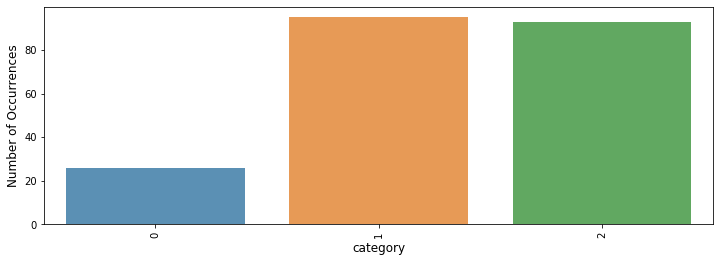

In [9]:
cnt_pro = df['category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [10]:
work_stress_counter, bullying_counter, sexual_harassment_counter = 0, 0, 0
for c in df['category']:
    if c==0:
        work_stress_counter+=1
    elif c == 1:
        bullying_counter+=1
    else:
        sexual_harassment_counter+=1
print("Work Stress Total Data Count: ", work_stress_counter)
print("Bullying Total Data Count: ", bullying_counter)
print("Sexual Harassment Total Data Count: ", sexual_harassment_counter)

Work Stress Total Data Count:  26
Bullying Total Data Count:  95
Sexual Harassment Total Data Count:  93


In [11]:
print(df.story[2])
print(df.category[2])

i have been called hurtful names and i have been called black bitch and people are making fun of me for being black by my suppost to be friend t and she has posted rumors about me and i dont know what to do.
1


In [12]:
print(df.story[0])
print(df.category[0])

Just like any other day, employees arrived in the workplace sparingly, filling the cubicles and getting their coffees ready. Once more, the manager was already sitting at his desk, grumbling and shouting - You’re way too slow, again! How am I supposed to get my work done with you slowing me down every day? The other employees were staring at each other. They were embarrassed by his outburst but deep inside they knew he was right. Satisfied by the nods in the assembly, the manager calmed down. As usual, he quickly got absorbed by his screen and numerous emails. He was not the moody type, just a normal guy. His team liked him very much and his performance record was exemplary. He was often described as someone caring and trustworthy with a genuine interest in people. Yet once again, his fist hit the desk loudly as he started screaming. That’s it, I’m done! Slow and unreliable old crap! You made me lose five hours of my life, again. World will be better off without you and I’m going to le

In [13]:
print(df.story[10])
print(df.category[10])

I worked as an office manager, and the only woman, for an industrial insulation company. I had just come back from maternity leave and I was worried about my milk supply. I went into the bathroom to pump for about 15 minutes every two hours, and all of the men in the office would stand in the break area (right in front of the bathroom door) and make baby crying noises to make fun of me. Eventually it progressed to the point that they would make crying noises every time they passed my desk in hopes that I would leak through my shirt. They would also make comments about how much larger my breasts were since having a baby. I felt so harassed and unsafe that I would dread going to work every day, and I even had more than a few nervous breakdowns. My husband was furious and I had to convince him not to take any drastic action so that I could be sure to have a good reference if I needed to find another job. We had a long conversation and looked at our finances and decided the extra money was

In [14]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['story'] = df['story'].apply(cleanText)

In [15]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

### WITH TRAIN_TEST_SPLIT

In [16]:
train, test = train_test_split(df, test_size = .20, random_state = 2)

In [17]:
train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)

In [18]:
train

,story,category
2,i have been called hurtful names and i have be...,1
213,"i was on the tram, on my way back to my shared...",2
3,at my old school kids would hit me and call me...,1
164,"my team partner, who was engaged at the time, ...",2
14,"i’m a waitress, and i get harassed daily by cu...",2
...,...,...
43,i was on my way from gabtoli to mirpur on a bu...,2
22,"hi, i'm rahul. i was bullied all through schoo...",1
72,"when i was in 7th grade, i had a semester of m...",1
15,"i got made fun of for being fat in elementary,...",1


In [19]:
len(train)

171

In [20]:
test

,story,category
23,i was born with a craniofacial disease called ...,1
155,i thought i knew my master's thesis adviser we...,2
207,"this was in 1993, i was 19. i got on a bus fro...",2
13,i work in law enforcement. i started out as a ...,2
64,i had this one particular kid who would pick o...,1
131,my boyfriend and i were watching a movie in hi...,2
141,"pretty minor, but funny. i was transferred int...",0
193,i was at my powerlifting gym squatting early i...,2
93,i have a weird name. i don't even know why i h...,1
30,a girl jumped on me on my friend's house! she ...,2


In [21]:
len(test)

43

In [22]:
train_tagged

2      ([have, been, called, hurtful, names, and, hav...
213    ([was, on, the, tram, on, my, way, back, to, m...
3      ([at, my, old, school, kids, would, hit, me, a...
164    ([my, team, partner, who, was, engaged, at, th...
14     ([waitress, and, get, harassed, daily, by, cus...
                             ...                        
43     ([was, on, my, way, from, gabtoli, to, mirpur,...
22     ([hi, 'm, rahul, was, bullied, all, through, s...
72     ([when, was, in, 7th, grade, had, semester, of...
15     ([got, made, fun, of, for, being, fat, in, ele...
168    ([let, me, tell, you, about, few, of, my, eper...
Length: 171, dtype: object

In [23]:
train_tagged.values[2]

TaggedDocument(words=['at', 'my', 'old', 'school', 'kids', 'would', 'hit', 'me', 'and', 'call', 'me', 'names', 'one', 'time', 'one', 'of', 'them', 'ran', 'into', 'me', 'and', 'hit', 'my', 'head', 'on', 'the', 'floor', 'and', 'after', 'felt', 'like', 'someone', 'was', 'stabbing', 'my', 'head', 'all', 'weekend', 'at', 'first', 'didn', 'tell', 'my', 'mom', 'but', 'it', 'ended', 'up', 'getting', 'so', 'bad', 'that', 'had', 'to', 'transfer', 'now', 'do', "n't", 'know', 'how', 'will', 'cope', 'in', 'new', 'environment', 'with', 'new', 'people', 'fear', 'would', 'end', 'up', 'in', 'similar', 'situation'], tags=[1])

In [24]:
test_tagged.values[1]

TaggedDocument(words=['thought', 'knew', 'my', 'master', "'s", 'thesis', 'adviser', 'well', 'was', 'senior', 'and', 'was', 'married', 'for', 'three', 'years', 'he', 'was', 'married', 'too', 'he', 'was', 'bishop', 'of', 'my', 'church', 'as', 'well', 'when', 'we', 'met', 'in', 'his', 'office', 'to', 'discuss', 'my', 'thesis', 'it', 'was', 'strictly', 'professional', 'at', 'first', 'then', 'he', 'started', 'to', 'kiss', 'me', 'which', 'eventually', 'led', 'to', 'french', 'kissing', 'in', 'the', 'net', 'months', 'he', 'groped', 'different', 'parts', 'of', 'my', 'body', 'then', 'he', 'eposed', 'himself', 'to', 'me', 'never', 'touched', 'it', 'nor', 'did', 'we', 'ever', 'have', 'intercourse', 'but', 'he', 'told', 'me', 'that', 'god', 'had', 'brought', 'us', 'together', 'this', 'kept', 'up', 'the', 'entire', 'time', 'he', 'was', 'advising', 'me', 'was', 'terrified', 'because', 'never', 'knew', 'what', 'was', 'going', 'to', 'happen', 'could', "n't", 'tell', 'him', 'no', 'because', 'he', 'held'

### PV-DBOW

In [25]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 171/171 [00:00<00:00, 1020236.11it/s]


In [26]:
%%time
for epoch in range(5):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 171/171 [00:00<00:00, 1318430.12it/s]

CPU times: user 303 ms, sys: 7.45 ms, total: 310 ms
Wall time: 116 ms


In [27]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [28]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [29]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [30]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.813953488372093
Testing F1 score: 0.8126751561040365

Testing Confusion Matrix: 
[[ 4  1  1]
 [ 0 13  3]
 [ 1  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.81      0.81      0.81        16
           2       0.82      0.86      0.84        21

    accuracy                           0.81        43
   macro avg       0.81      0.78      0.79        43
weighted avg       0.81      0.81      0.81        43



### PV-DM

In [31]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 171/171 [00:00<00:00, 622052.02it/s]


In [32]:
%%time
for epoch in range(5):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 171/171 [00:00<00:00, 653806.73it/s]

CPU times: user 364 ms, sys: 19.8 ms, total: 384 ms
Wall time: 156 ms


In [33]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)

In [34]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [35]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.8837209302325582
Testing F1 score: 0.8818468353352075

Testing Confusion Matrix: 
[[ 6  0  0]
 [ 0 12  4]
 [ 1  0 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.75      0.86        16
           2       0.83      0.95      0.89        21

    accuracy                           0.88        43
   macro avg       0.90      0.90      0.89        43
weighted avg       0.90      0.88      0.88        43



### Paired Model

In [36]:
model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [37]:
new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])

In [38]:
def get_vectors(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [39]:
y_train, X_train = get_vectors(new_model, train_tagged)
y_test, X_test = get_vectors(new_model, test_tagged)

In [40]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [41]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('\nTesting Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred),"\n")
print('Testing Classification Report: ')
print(classification_report(y_test, y_pred))

Testing accuracy 0.8837209302325582
Testing F1 score: 0.8825128360012079

Testing Confusion Matrix: 
[[ 6  0  0]
 [ 1 12  3]
 [ 1  0 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.75      0.86        16
           2       0.87      0.95      0.91        21

    accuracy                           0.88        43
   macro avg       0.87      0.90      0.87        43
weighted avg       0.90      0.88      0.88        43



### WITH K-FOLD

In [42]:
X = df['story']
print("Length: ", len(X))
print("Type: ", type(X))
print("First Ten Values:\n", X[:10])
print(X[0])

Length:  214
Type:  <class 'pandas.core.series.Series'>
First Ten Values:
 0    just like any other day, employees arrived in ...
1    my so-called ‘friends’ in middle school used t...
2    i have been called hurtful names and i have be...
3    at my old school kids would hit me and call me...
4    i had debilitating migraines for three years b...
5    i love my work, but hate going each day becaus...
6    i have a chronic illness which was doing well ...
7    the other part is that sense of worthlessness....
8    i feel my whole body hurting. my mental health...
9    as a librarian, i've been threatened with stal...
Name: story, dtype: object
just like any other day, employees arrived in the workplace sparingly, filling the cubicles and getting their coffees ready. once more, the manager was already sitting at his desk, grumbling and shouting - you’re way too slow, again! how am i supposed to get my work done with you slowing me down every day? the other employees were staring at each

In [43]:
y = df['category']
print("Length: ", len(y))
print("Type: ", type(y))
print("First Ten Values: ", y[:10])

Length:  214
Type:  <class 'pandas.core.series.Series'>
First Ten Values:  0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    0
9    2
Name: category, dtype: int64


In [44]:
ten_fold = KFold(n_splits=10)
ten_fold

KFold(n_splits=10, random_state=None, shuffle=False)

In [45]:
total_fold = ten_fold.get_n_splits(X)
print(total_fold)

10


### K-FOLD PV-DBOW

In [46]:
print("Total Fold: ", total_fold)
fold_no = 1
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    logreg = LogisticRegression(n_jobs=1, C=1e5)
    logreg.fit(X_trained, y_trained)
    y_pred = logreg.predict(X_tested)
    
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    
    print("\n\n")
    fold_no+=1

Total Fold:  10


100%|██████████| 192/192 [00:00<00:00, 1513733.77it/s]


Fold No.:  1
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9090909090909091

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 1  0  5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00        10
           2       0.83      0.83      0.83         6

    accuracy                           0.91        22
   macro avg       0.89      0.89      0.89        22
weighted avg       0.91      0.91      0.91        22






100%|██████████| 192/192 [00:00<00:00, 805306.37it/s]


Fold No.:  2
Testing accuracy 0.6818181818181818
Testing F1 score: 0.6909090909090909

Testing Confusion Matrix: 
[[1 0 0]
 [1 7 3]
 [1 2 7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.78      0.64      0.70        11
           2       0.70      0.70      0.70        10

    accuracy                           0.68        22
   macro avg       0.60      0.78      0.63        22
weighted avg       0.72      0.68      0.69        22






100%|██████████| 192/192 [00:00<00:00, 1545693.60it/s]


Fold No.:  3
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9517045454545454

Testing Confusion Matrix: 
[[ 5  0  0]
 [ 0 15  2]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.88      0.94        17
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.67      0.63      0.65        22
weighted avg       1.00      0.91      0.95        22






100%|██████████| 192/192 [00:00<00:00, 839735.52it/s]


Fold No.:  4
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9523809523809524

Testing Confusion Matrix: 
[[20  2]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.50      0.45      0.48        22
weighted avg       1.00      0.91      0.95        22






100%|██████████| 193/193 [00:00<00:00, 803076.06it/s]


Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21






100%|██████████| 193/193 [00:00<00:00, 1463834.85it/s]


Fold No.:  6
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9746031746031747

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        13
           2       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.67      0.62      0.64        21
weighted avg       1.00      0.95      0.97        21






100%|██████████| 193/193 [00:00<00:00, 607277.32it/s]


Fold No.:  7
Testing accuracy 0.6190476190476191
Testing F1 score: 0.6857142857142857

Testing Confusion Matrix: 
[[7 2 3]
 [0 0 0]
 [1 2 6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.00      0.00      0.00         0
           2       0.67      0.67      0.67         9

    accuracy                           0.62        21
   macro avg       0.51      0.42      0.46        21
weighted avg       0.79      0.62      0.69        21






100%|██████████| 193/193 [00:00<00:00, 1318405.00it/s]


Fold No.:  8
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8907029478458048

Testing Confusion Matrix: 
[[ 1  1  0]
 [ 0  0  0]
 [ 0  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       1.00      0.84      0.91        19

    accuracy                           0.81        21
   macro avg       0.67      0.45      0.53        21
weighted avg       1.00      0.81      0.89        21






100%|██████████| 193/193 [00:00<00:00, 628006.73it/s]


Fold No.:  9
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9500000000000002

Testing Confusion Matrix: 
[[ 0  0]
 [ 2 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.90      0.95        21

    accuracy                           0.90        21
   macro avg       0.50      0.45      0.48        21
weighted avg       1.00      0.90      0.95        21






100%|██████████| 193/193 [00:00<00:00, 845873.22it/s]


Fold No.:  10
Testing accuracy 0.8571428571428571
Testing F1 score: 0.8791208791208792

Testing Confusion Matrix: 
[[ 0  1]
 [ 2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.95      0.90      0.92        20

    accuracy                           0.86        21
   macro avg       0.47      0.45      0.46        21
weighted avg       0.90      0.86      0.88        21






### K-FOLD PV-DM 

In [47]:
fold_no = 1
print("Total Fold: ", total_fold)
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    logreg = LogisticRegression(n_jobs=1, C=1e5)
    logreg.fit(X_trained, y_trained)
    y_pred = logreg.predict(X_tested)
    
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    print("\n\n")
    fold_no+=1

Total Fold:  10


100%|██████████| 192/192 [00:00<00:00, 706409.09it/s]


Fold No.:  1
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9123221276331325

Testing Confusion Matrix: 
[[5 0 1]
 [0 9 1]
 [0 0 6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      0.90      0.95        10
           2       0.75      1.00      0.86         6

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.90        22
weighted avg       0.93      0.91      0.91        22






100%|██████████| 192/192 [00:00<00:00, 724196.37it/s]


Fold No.:  2
Testing accuracy 0.6363636363636364
Testing F1 score: 0.6521531100478469

Testing Confusion Matrix: 
[[1 0 0]
 [2 6 3]
 [1 2 7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.75      0.55      0.63        11
           2       0.70      0.70      0.70        10

    accuracy                           0.64        22
   macro avg       0.57      0.75      0.58        22
weighted avg       0.70      0.64      0.65        22






100%|██████████| 192/192 [00:00<00:00, 766228.70it/s]


Fold No.:  3
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9765840220385674

Testing Confusion Matrix: 
[[ 5  0  0]
 [ 0 16  1]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.94      0.97        17
           2       0.00      0.00      0.00         0

    accuracy                           0.95        22
   macro avg       0.67      0.65      0.66        22
weighted avg       1.00      0.95      0.98        22






100%|██████████| 192/192 [00:00<00:00, 557691.39it/s]


Fold No.:  4
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9767441860465117

Testing Confusion Matrix: 
[[21  1]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        22
           2       0.00      0.00      0.00         0

    accuracy                           0.95        22
   macro avg       0.50      0.48      0.49        22
weighted avg       1.00      0.95      0.98        22






100%|██████████| 193/193 [00:00<00:00, 1479891.54it/s]


Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21






100%|██████████| 193/193 [00:00<00:00, 757959.43it/s]


Fold No.:  6
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[13  0]
 [ 0  8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21






100%|██████████| 193/193 [00:00<00:00, 732579.79it/s]


Fold No.:  7
Testing accuracy 0.7142857142857143
Testing F1 score: 0.7639097744360901

Testing Confusion Matrix: 
[[7 2 3]
 [0 0 0]
 [0 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.00      0.00      0.00         0
           2       0.73      0.89      0.80         9

    accuracy                           0.71        21
   macro avg       0.58      0.49      0.51        21
weighted avg       0.88      0.71      0.76        21






100%|██████████| 193/193 [00:00<00:00, 781371.31it/s]


Fold No.:  8
Testing accuracy 0.8571428571428571
Testing F1 score: 0.8948948948948948

Testing Confusion Matrix: 
[[ 1  0  1]
 [ 0  0  0]
 [ 0  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       0.94      0.89      0.92        19

    accuracy                           0.86        21
   macro avg       0.65      0.46      0.53        21
weighted avg       0.95      0.86      0.89        21






100%|██████████| 193/193 [00:00<00:00, 823500.17it/s]


Fold No.:  9
Testing accuracy 0.8571428571428571
Testing F1 score: 0.923076923076923

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.86      0.92        21

    accuracy                           0.86        21
   macro avg       0.33      0.29      0.31        21
weighted avg       1.00      0.86      0.92        21






100%|██████████| 193/193 [00:00<00:00, 741300.98it/s]


Fold No.:  10
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9047619047619048

Testing Confusion Matrix: 
[[ 0  1]
 [ 1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.95      0.95      0.95        20

    accuracy                           0.90        21
   macro avg       0.47      0.47      0.48        21
weighted avg       0.90      0.90      0.90        21






### PAIRED MODEL

In [48]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    logreg_dbow = LogisticRegression(n_jobs=1, C=1e5)
    logreg_dbow.fit(X_trained, y_trained)
    y_pred = logreg_dbow.predict(X_tested)
    
    print("FOR PV_DBOW: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    logreg_dm = LogisticRegression(n_jobs=1, C=1e5)
    logreg_dm.fit(X_trained, y_trained)
    y_pred = logreg_dm.predict(X_tested)
    
    print("FOR PV_DM: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    logreg_paired = LogisticRegression(n_jobs=1, C=1e5)
    logreg_paired.fit(X_train, y_train)
    y_pred = logreg_paired.predict(X_test)
    
    print("FOR Paired Model: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 10




100%|██████████| 192/192 [00:00<00:00, 772105.82it/s]

FOR PV_DBOW: 
Fold No.:  1
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9064935064935065

Testing Confusion Matrix: 
[[ 4  0  2]
 [ 0 10  0]
 [ 0  0  6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00        10
           2       0.75      1.00      0.86         6

    accuracy                           0.91        22
   macro avg       0.92      0.89      0.89        22
weighted avg       0.93      0.91      0.91        22







100%|██████████| 192/192 [00:00<00:00, 1150437.67it/s]


FOR PV_DM: 
Fold No.:  1
Testing accuracy 0.8636363636363636
Testing F1 score: 0.8669856459330144

Testing Confusion Matrix: 
[[4 0 2]
 [0 9 1]
 [0 0 6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      0.90      0.95        10
           2       0.67      1.00      0.80         6

    accuracy                           0.86        22
   macro avg       0.89      0.86      0.85        22
weighted avg       0.91      0.86      0.87        22




FOR Paired Model: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9064935064935065

Testing Confusion Matrix: 
[[ 4  0  2]
 [ 0 10  0]
 [ 0  0  6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       1.00      1.00      1.00        10
           2       0.75      1.00      0.86         6

    accuracy       

100%|██████████| 192/192 [00:00<00:00, 663349.56it/s]

FOR PV_DBOW: 
Fold No.:  2
Testing accuracy 0.7272727272727273
Testing F1 score: 0.737468671679198

Testing Confusion Matrix: 
[[1 0 0]
 [1 7 3]
 [1 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.88      0.64      0.74        11
           2       0.73      0.80      0.76        10

    accuracy                           0.73        22
   macro avg       0.65      0.81      0.67        22
weighted avg       0.78      0.73      0.74        22







100%|██████████| 192/192 [00:00<00:00, 734098.79it/s]


FOR PV_DM: 
Fold No.:  2
Testing accuracy 0.6818181818181818
Testing F1 score: 0.7121212121212122

Testing Confusion Matrix: 
[[1 0 0]
 [3 6 2]
 [1 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       0.86      0.55      0.67        11
           2       0.80      0.80      0.80        10

    accuracy                           0.68        22
   macro avg       0.62      0.78      0.60        22
weighted avg       0.80      0.68      0.71        22




FOR Paired Model: 
Testing accuracy 0.7727272727272727
Testing F1 score: 0.8009569377990431

Testing Confusion Matrix: 
[[1 0 0]
 [2 8 1]
 [1 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.89      0.73      0.80        11
           2       0.89      0.80      0.84        10

    accuracy                

100%|██████████| 192/192 [00:00<00:00, 636102.98it/s]

FOR PV_DBOW: 
Fold No.:  3
Testing accuracy 0.8636363636363636
Testing F1 score: 0.9044995408631771

Testing Confusion Matrix: 
[[ 4  1  0]
 [ 0 15  2]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      0.88      0.91        17
           2       0.00      0.00      0.00         0

    accuracy                           0.86        22
   macro avg       0.65      0.56      0.60        22
weighted avg       0.95      0.86      0.90        22







100%|██████████| 192/192 [00:00<00:00, 664444.20it/s]


FOR PV_DM: 
Fold No.:  3
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9765840220385674

Testing Confusion Matrix: 
[[ 5  0  0]
 [ 0 16  1]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.94      0.97        17
           2       0.00      0.00      0.00         0

    accuracy                           0.95        22
   macro avg       0.67      0.65      0.66        22
weighted avg       1.00      0.95      0.98        22




FOR Paired Model: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9292929292929292

Testing Confusion Matrix: 
[[ 4  1  0]
 [ 0 16  1]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      0.94      0.94        17
           2       0.00      0.00      0.00         0

    accura

100%|██████████| 192/192 [00:00<00:00, 655253.35it/s]

FOR PV_DBOW: 
Fold No.:  4
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9767441860465117

Testing Confusion Matrix: 
[[21  1]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        22
           2       0.00      0.00      0.00         0

    accuracy                           0.95        22
   macro avg       0.50      0.48      0.49        22
weighted avg       1.00      0.95      0.98        22







100%|██████████| 192/192 [00:00<00:00, 802097.98it/s]


FOR PV_DM: 
Fold No.:  4
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22




FOR Paired Model: 
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9767441860465117

Testing Confusion Matrix: 
[[ 0  0]
 [ 1 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        22

    accuracy                           0.95        22
   macro avg       0.50      0.48      0.49        22
weighted avg       1.00      0.95      0.98        22



100%|██████████| 193/193 [00:00<00:00, 591740.26it/s]

FOR PV_DBOW: 
Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21







100%|██████████| 193/193 [00:00<00:00, 741980.45it/s]


FOR PV_DM: 
Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21




FOR Paired Model: 
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



100%|██████████| 193/193 [00:00<00:00, 670671.64it/s]

FOR PV_DBOW: 
Fold No.:  6
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9746031746031747

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        13
           2       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.67      0.62      0.64        21
weighted avg       1.00      0.95      0.97        21







100%|██████████| 193/193 [00:00<00:00, 1239664.12it/s]


FOR PV_DM: 
Fold No.:  6
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9746031746031747

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        13
           2       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.67      0.62      0.64        21
weighted avg       1.00      0.95      0.97        21




FOR Paired Model: 
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9498412698412698

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1 12  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        13
           2       1.00      0.88      0.93         8

    accura

100%|██████████| 193/193 [00:00<00:00, 693065.64it/s]

FOR PV_DBOW: 
Fold No.:  7
Testing accuracy 0.6190476190476191
Testing F1 score: 0.6857142857142857

Testing Confusion Matrix: 
[[7 2 3]
 [0 0 0]
 [1 2 6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.00      0.00      0.00         0
           2       0.67      0.67      0.67         9

    accuracy                           0.62        21
   macro avg       0.51      0.42      0.46        21
weighted avg       0.79      0.62      0.69        21







100%|██████████| 193/193 [00:00<00:00, 769487.33it/s]


FOR PV_DM: 
Fold No.:  7
Testing accuracy 0.6190476190476191
Testing F1 score: 0.6766917293233082

Testing Confusion Matrix: 
[[6 3 3]
 [0 0 0]
 [1 1 7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.00      0.00      0.00         0
           2       0.70      0.78      0.74         9

    accuracy                           0.62        21
   macro avg       0.52      0.43      0.46        21
weighted avg       0.79      0.62      0.68        21




FOR Paired Model: 
Testing accuracy 0.7142857142857143
Testing F1 score: 0.7687074829931975

Testing Confusion Matrix: 
[[8 2 2]
 [0 0 0]
 [1 1 7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.00      0.00      0.00         0
           2       0.78      0.78      0.78         9

    accuracy                

100%|██████████| 193/193 [00:00<00:00, 802280.15it/s]

FOR PV_DBOW: 
Fold No.:  8
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8907029478458048

Testing Confusion Matrix: 
[[ 1  1  0]
 [ 0  0  0]
 [ 0  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       1.00      0.84      0.91        19

    accuracy                           0.81        21
   macro avg       0.67      0.45      0.53        21
weighted avg       1.00      0.81      0.89        21







100%|██████████| 193/193 [00:00<00:00, 690700.23it/s]


FOR PV_DM: 
Fold No.:  8
Testing accuracy 0.8571428571428571
Testing F1 score: 0.8948948948948948

Testing Confusion Matrix: 
[[ 1  0  1]
 [ 0  0  0]
 [ 0  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       0.94      0.89      0.92        19

    accuracy                           0.86        21
   macro avg       0.65      0.46      0.53        21
weighted avg       0.95      0.86      0.89        21




FOR Paired Model: 
Testing accuracy 0.7619047619047619
Testing F1 score: 0.8272108843537415

Testing Confusion Matrix: 
[[ 0  2  0]
 [ 0  0  0]
 [ 0  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       1.00      0.84      0.91        19

    accura

100%|██████████| 193/193 [00:00<00:00, 627519.90it/s]

FOR PV_DBOW: 
Fold No.:  9
Testing accuracy 0.8571428571428571
Testing F1 score: 0.923076923076923

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.86      0.92        21

    accuracy                           0.86        21
   macro avg       0.33      0.29      0.31        21
weighted avg       1.00      0.86      0.92        21







100%|██████████| 193/193 [00:00<00:00, 719556.15it/s]


FOR PV_DM: 
Fold No.:  9
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8947368421052632

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 3  1 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.81      0.89        21

    accuracy                           0.81        21
   macro avg       0.33      0.27      0.30        21
weighted avg       1.00      0.81      0.89        21




FOR Paired Model: 
Testing accuracy 0.8571428571428571
Testing F1 score: 0.923076923076923

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.86      0.92        21

    accurac

100%|██████████| 193/193 [00:00<00:00, 665707.79it/s]

FOR PV_DBOW: 
Fold No.:  10
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9047619047619048

Testing Confusion Matrix: 
[[ 0  1]
 [ 1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.95      0.95      0.95        20

    accuracy                           0.90        21
   macro avg       0.47      0.47      0.48        21
weighted avg       0.90      0.90      0.90        21







100%|██████████| 193/193 [00:00<00:00, 1066535.80it/s]


FOR PV_DM: 
Fold No.:  10
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9291521486643438

Testing Confusion Matrix: 
[[ 0  1]
 [ 0 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.95      1.00      0.98        20

    accuracy                           0.95        21
   macro avg       0.48      0.50      0.49        21
weighted avg       0.91      0.95      0.93        21




FOR Paired Model: 
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9047619047619048

Testing Confusion Matrix: 
[[ 0  1]
 [ 1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.95      0.95      0.95        20

    accuracy                           0.90        21
   macro avg       0.47      0.47      0.48        21
weighted avg       0.90      0.90      0.90  

### Decision Tree

In [49]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DBOW Using Decision Tree with Entropy: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DM Using Decision Tree with Entropy:  ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR Paired Model Using Decision Tree with Entropy: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 10




100%|██████████| 192/192 [00:00<00:00, 1160383.82it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  1
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9090909090909091

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 1  0  5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00        10
           2       0.83      0.83      0.83         6

    accuracy                           0.91        22
   macro avg       0.89      0.89      0.89        22
weighted avg       0.91      0.91      0.91        22







100%|██████████| 192/192 [00:00<00:00, 755446.87it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  1
Testing accuracy 0.8181818181818182
Testing F1 score: 0.8181818181818182

Testing Confusion Matrix: 
[[5 0 1]
 [0 9 1]
 [1 1 4]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.90      0.90      0.90        10
           2       0.67      0.67      0.67         6

    accuracy                           0.82        22
   macro avg       0.80      0.80      0.80        22
weighted avg       0.82      0.82      0.82        22




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.8181818181818182
Testing F1 score: 0.8181818181818182

Testing Confusion Matrix: 
[[5 0 1]
 [0 9 1]
 [1 1 4]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.90      0.90      0.90        10
           2    

100%|██████████| 192/192 [00:00<00:00, 751218.63it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  2
Testing accuracy 0.8636363636363636
Testing F1 score: 0.881692868534974

Testing Confusion Matrix: 
[[ 1  0  0]
 [ 0 10  1]
 [ 2  0  8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.91      0.95        11
           2       0.89      0.80      0.84        10

    accuracy                           0.86        22
   macro avg       0.74      0.90      0.76        22
weighted avg       0.92      0.86      0.88        22







100%|██████████| 192/192 [00:00<00:00, 1116929.78it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  2
Testing accuracy 0.5909090909090909
Testing F1 score: 0.6828877005347593

Testing Confusion Matrix: 
[[1 0 0]
 [4 6 1]
 [4 0 6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.11      1.00      0.20         1
           1       1.00      0.55      0.71        11
           2       0.86      0.60      0.71        10

    accuracy                           0.59        22
   macro avg       0.66      0.72      0.54        22
weighted avg       0.89      0.59      0.68        22




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.5909090909090909
Testing F1 score: 0.6828877005347593

Testing Confusion Matrix: 
[[1 0 0]
 [4 6 1]
 [4 0 6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.11      1.00      0.20         1
           1       1.00      0.55      0.71        11
           2    

100%|██████████| 192/192 [00:00<00:00, 646832.42it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  3
Testing accuracy 0.8181818181818182
Testing F1 score: 0.8781565656565656

Testing Confusion Matrix: 
[[ 4  1  0]
 [ 0 14  3]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.93      0.82      0.87        17
           2       0.00      0.00      0.00         0

    accuracy                           0.82        22
   macro avg       0.64      0.54      0.59        22
weighted avg       0.95      0.82      0.88        22







100%|██████████| 192/192 [00:00<00:00, 777322.75it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  3
Testing accuracy 0.8636363636363636
Testing F1 score: 0.9264520202020201

Testing Confusion Matrix: 
[[ 4  0  1]
 [ 0 15  2]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.88      0.94        17
           2       0.00      0.00      0.00         0

    accuracy                           0.86        22
   macro avg       0.67      0.56      0.61        22
weighted avg       1.00      0.86      0.93        22




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.8636363636363636
Testing F1 score: 0.9264520202020201

Testing Confusion Matrix: 
[[ 4  0  1]
 [ 0 15  2]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.88      0.94        1

100%|██████████| 192/192 [00:00<00:00, 163513.98it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  4
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9523809523809524

Testing Confusion Matrix: 
[[20  2]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.50      0.45      0.48        22
weighted avg       1.00      0.91      0.95        22







100%|██████████| 192/192 [00:00<00:00, 665542.45it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  4
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9523809523809524

Testing Confusion Matrix: 
[[20  2]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.50      0.45      0.48        22
weighted avg       1.00      0.91      0.95        22




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9523809523809524

Testing Confusion Matrix: 
[[20  2]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.50      0.45

100%|██████████| 193/193 [00:00<00:00, 615122.09it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21







100%|██████████| 193/193 [00:00<00:00, 805473.31it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  5
Testing accuracy 0.9523809523809523
Testing F1 score: 0.975609756097561

Testing Confusion Matrix: 
[[20  1]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.00      0.00      0.00         0

    accuracy                           0.95        21
   macro avg       0.50      0.48      0.49        21
weighted avg       1.00      0.95      0.98        21




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.9523809523809523
Testing F1 score: 0.975609756097561

Testing Confusion Matrix: 
[[20  1]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.00      0.00      0.00         0

    accuracy                           0.95        21
   macro avg       0.50      0.48  

100%|██████████| 193/193 [00:00<00:00, 661356.76it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  6
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9746031746031747

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        13
           2       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.67      0.62      0.64        21
weighted avg       1.00      0.95      0.97        21







100%|██████████| 193/193 [00:00<00:00, 1133754.44it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  6
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9276190476190477

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 12  1]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        13
           2       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.62      0.60      0.61        21
weighted avg       0.95      0.90      0.93        21




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9276190476190477

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 12  1]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        1

100%|██████████| 193/193 [00:00<00:00, 711336.27it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  7
Testing accuracy 0.6666666666666666
Testing F1 score: 0.7157894736842104

Testing Confusion Matrix: 
[[7 2 3]
 [0 0 0]
 [1 1 7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.00      0.00      0.00         0
           2       0.70      0.78      0.74         9

    accuracy                           0.67        21
   macro avg       0.53      0.45      0.48        21
weighted avg       0.80      0.67      0.72        21







100%|██████████| 193/193 [00:00<00:00, 835398.01it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  7
Testing accuracy 0.42857142857142855
Testing F1 score: 0.4831932773109243

Testing Confusion Matrix: 
[[4 2 6]
 [0 0 0]
 [1 3 5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.00      0.00      0.00         0
           2       0.45      0.56      0.50         9

    accuracy                           0.43        21
   macro avg       0.42      0.30      0.32        21
weighted avg       0.65      0.43      0.48        21




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.42857142857142855
Testing F1 score: 0.4831932773109243

Testing Confusion Matrix: 
[[4 2 6]
 [0 0 0]
 [1 3 5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.00      0.00      0.00         0
           2  

100%|██████████| 193/193 [00:00<00:00, 661897.52it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  8
Testing accuracy 0.7142857142857143
Testing F1 score: 0.7983193277310925

Testing Confusion Matrix: 
[[ 0  2  0]
 [ 0  0  0]
 [ 2  2 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       1.00      0.79      0.88        19

    accuracy                           0.71        21
   macro avg       0.33      0.26      0.29        21
weighted avg       0.90      0.71      0.80        21







100%|██████████| 193/193 [00:00<00:00, 753023.88it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  8
Testing accuracy 0.6666666666666666
Testing F1 score: 0.7986111111111113

Testing Confusion Matrix: 
[[ 1  1  0]
 [ 0  0  0]
 [ 0  6 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       1.00      0.68      0.81        19

    accuracy                           0.67        21
   macro avg       0.67      0.39      0.49        21
weighted avg       1.00      0.67      0.80        21




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.6666666666666666
Testing F1 score: 0.7986111111111113

Testing Confusion Matrix: 
[[ 1  1  0]
 [ 0  0  0]
 [ 0  6 13]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         

100%|██████████| 193/193 [00:00<00:00, 869495.89it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  9
Testing accuracy 0.9523809523809523
Testing F1 score: 0.975609756097561

Testing Confusion Matrix: 
[[ 0  0]
 [ 1 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.95      0.98        21

    accuracy                           0.95        21
   macro avg       0.50      0.48      0.49        21
weighted avg       1.00      0.95      0.98        21







100%|██████████| 193/193 [00:00<00:00, 836261.02it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  9
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8947368421052632

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  3 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.81      0.89        21

    accuracy                           0.81        21
   macro avg       0.33      0.27      0.30        21
weighted avg       1.00      0.81      0.89        21




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8947368421052632

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  3 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         

100%|██████████| 193/193 [00:00<00:00, 651771.88it/s]

FOR PV_DBOW Using Decision Tree with Entropy: 
Fold No.:  10
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9047619047619048

Testing Confusion Matrix: 
[[ 0  1]
 [ 1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.95      0.95      0.95        20

    accuracy                           0.90        21
   macro avg       0.47      0.47      0.48        21
weighted avg       0.90      0.90      0.90        21







100%|██████████| 193/193 [00:00<00:00, 1268809.83it/s]


FOR PV_DM Using Decision Tree with Entropy:  
Fold No.:  10
Testing accuracy 0.7142857142857143
Testing F1 score: 0.7962184873949579

Testing Confusion Matrix: 
[[ 1  0]
 [ 6 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.14      1.00      0.25         1
           2       1.00      0.70      0.82        20

    accuracy                           0.71        21
   macro avg       0.57      0.85      0.54        21
weighted avg       0.96      0.71      0.80        21




FOR Paired Model Using Decision Tree with Entropy: 
Testing accuracy 0.7142857142857143
Testing F1 score: 0.7962184873949579

Testing Confusion Matrix: 
[[ 1  0]
 [ 6 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.14      1.00      0.25         1
           2       1.00      0.70      0.82        20

    accuracy                           0.71        21
   macro avg       0.57      0.8

In [50]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DBOW Using Decision Tree with Gini: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR PV_DM Using Decision Tree with Gini:  ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    dt_dbow_entropy = DecisionTreeClassifier(criterion = "gini", 
                                             random_state = 10, 
                                             max_depth = 3, 
                                             min_samples_leaf = 5)
    dt_dbow_entropy.fit(X_trained, y_trained)
    y_pred = dt_dbow_entropy.predict(X_tested)
    
    print("FOR Paired Model Using Decision Tree with Gini: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 10




100%|██████████| 192/192 [00:00<00:00, 664992.87it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  1
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9090909090909091

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 1  0  5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00        10
           2       0.83      0.83      0.83         6

    accuracy                           0.91        22
   macro avg       0.89      0.89      0.89        22
weighted avg       0.91      0.91      0.91        22







100%|██████████| 192/192 [00:00<00:00, 772105.82it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  1
Testing accuracy 0.7727272727272727
Testing F1 score: 0.7441558441558442

Testing Confusion Matrix: 
[[2 2 2]
 [0 9 1]
 [0 0 6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.82      0.90      0.86        10
           2       0.67      1.00      0.80         6

    accuracy                           0.77        22
   macro avg       0.83      0.74      0.72        22
weighted avg       0.83      0.77      0.74        22




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.7727272727272727
Testing F1 score: 0.7441558441558442

Testing Confusion Matrix: 
[[2 2 2]
 [0 9 1]
 [0 0 6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.82      0.90      0.86        10
           2       0.6

100%|██████████| 192/192 [00:00<00:00, 745654.04it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  2
Testing accuracy 0.7272727272727273
Testing F1 score: 0.7293025953313034

Testing Confusion Matrix: 
[[1 0 0]
 [0 7 4]
 [1 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.88      0.64      0.74        11
           2       0.67      0.80      0.73        10

    accuracy                           0.73        22
   macro avg       0.68      0.81      0.71        22
weighted avg       0.76      0.73      0.73        22







100%|██████████| 192/192 [00:00<00:00, 866852.93it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  2
Testing accuracy 0.7727272727272727
Testing F1 score: 0.7528532073986619

Testing Confusion Matrix: 
[[0 1 0]
 [0 8 3]
 [0 1 9]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      0.73      0.76        11
           2       0.75      0.90      0.82        10

    accuracy                           0.77        22
   macro avg       0.52      0.54      0.53        22
weighted avg       0.74      0.77      0.75        22




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.7727272727272727
Testing F1 score: 0.7528532073986619

Testing Confusion Matrix: 
[[0 1 0]
 [0 8 3]
 [0 1 9]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      0.73      0.76        11
           2       0.7

100%|██████████| 192/192 [00:00<00:00, 662803.60it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  3
Testing accuracy 0.8636363636363636
Testing F1 score: 0.9252199413489735

Testing Confusion Matrix: 
[[ 5  0  0]
 [ 0 14  3]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.82      0.90        17
           2       0.00      0.00      0.00         0

    accuracy                           0.86        22
   macro avg       0.67      0.61      0.63        22
weighted avg       1.00      0.86      0.93        22







100%|██████████| 192/192 [00:00<00:00, 720309.81it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  3
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[ 5  0]
 [ 0 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        17

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[ 5  0]
 [ 0 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        17

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00  

100%|██████████| 192/192 [00:00<00:00, 753326.82it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  4
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9523809523809524

Testing Confusion Matrix: 
[[20  2]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.50      0.45      0.48        22
weighted avg       1.00      0.91      0.95        22







100%|██████████| 192/192 [00:00<00:00, 667749.89it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  4
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9767441860465117

Testing Confusion Matrix: 
[[ 0  0]
 [ 1 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        22

    accuracy                           0.95        22
   macro avg       0.50      0.48      0.49        22
weighted avg       1.00      0.95      0.98        22




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9767441860465117

Testing Confusion Matrix: 
[[ 0  0]
 [ 1 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        22

    accuracy                           0.95        22
   macro avg       0.50      0.48      

100%|██████████| 193/193 [00:00<00:00, 612793.85it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21







100%|██████████| 193/193 [00:00<00:00, 792075.02it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



100%|██████████| 193/193 [00:00<00:00, 887610.39it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  6
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9746031746031747

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        13
           2       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.67      0.62      0.64        21
weighted avg       1.00      0.95      0.97        21







100%|██████████| 193/193 [00:00<00:00, 647600.54it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  6
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8520277676287907

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1 10  2]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.77      0.87        13
           2       0.78      0.88      0.82         8

    accuracy                           0.81        21
   macro avg       0.59      0.55      0.56        21
weighted avg       0.92      0.81      0.85        21




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8520277676287907

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1 10  2]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.77      0.87        13
    

100%|██████████| 193/193 [00:00<00:00, 637402.10it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  7
Testing accuracy 0.3333333333333333
Testing F1 score: 0.4159663865546218

Testing Confusion Matrix: 
[[3 6 3]
 [0 0 0]
 [2 3 4]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.25      0.35        12
           1       0.00      0.00      0.00         0
           2       0.57      0.44      0.50         9

    accuracy                           0.33        21
   macro avg       0.39      0.23      0.28        21
weighted avg       0.59      0.33      0.42        21







100%|██████████| 193/193 [00:00<00:00, 1303543.76it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  7
Testing accuracy 0.6190476190476191
Testing F1 score: 0.6967418546365914

Testing Confusion Matrix: 
[[6 3 3]
 [0 0 0]
 [0 2 7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.00      0.00      0.00         0
           2       0.70      0.78      0.74         9

    accuracy                           0.62        21
   macro avg       0.57      0.43      0.47        21
weighted avg       0.87      0.62      0.70        21




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.6190476190476191
Testing F1 score: 0.6967418546365914

Testing Confusion Matrix: 
[[6 3 3]
 [0 0 0]
 [0 2 7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.00      0.00      0.00         0
           2       0.7

100%|██████████| 193/193 [00:00<00:00, 166153.67it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  8
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9755469755469756

Testing Confusion Matrix: 
[[ 2  0  0]
 [ 0  0  0]
 [ 0  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       1.00      0.95      0.97        19

    accuracy                           0.95        21
   macro avg       0.67      0.65      0.66        21
weighted avg       1.00      0.95      0.98        21







100%|██████████| 193/193 [00:00<00:00, 1077897.03it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  8
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8677248677248677

Testing Confusion Matrix: 
[[ 1  0  1]
 [ 0  0  0]
 [ 0  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       0.94      0.84      0.89        19

    accuracy                           0.81        21
   macro avg       0.65      0.45      0.52        21
weighted avg       0.95      0.81      0.87        21




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8677248677248677

Testing Confusion Matrix: 
[[ 1  0  1]
 [ 0  0  0]
 [ 0  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
    

100%|██████████| 193/193 [00:00<00:00, 1138538.22it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  9
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21







100%|██████████| 193/193 [00:00<00:00, 745396.57it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  9
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8947368421052632

Testing Confusion Matrix: 
[[ 0  0]
 [ 4 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.81      0.89        21

    accuracy                           0.81        21
   macro avg       0.50      0.40      0.45        21
weighted avg       1.00      0.81      0.89        21




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8947368421052632

Testing Confusion Matrix: 
[[ 0  0]
 [ 4 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.81      0.89        21

    accuracy                           0.81        21
   macro avg       0.50      0.40      

100%|██████████| 193/193 [00:00<00:00, 746083.57it/s]

FOR PV_DBOW Using Decision Tree with Gini: 
Fold No.:  10
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9047619047619048

Testing Confusion Matrix: 
[[ 0  1]
 [ 1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.95      0.95      0.95        20

    accuracy                           0.90        21
   macro avg       0.47      0.47      0.48        21
weighted avg       0.90      0.90      0.90        21







100%|██████████| 193/193 [00:00<00:00, 1163075.68it/s]


FOR PV_DM Using Decision Tree with Gini:  
Fold No.:  10
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8751608751608752

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1  0  0]
 [ 1  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      0.85      0.92        20

    accuracy                           0.81        21
   macro avg       0.33      0.28      0.31        21
weighted avg       0.95      0.81      0.88        21




FOR Paired Model Using Decision Tree with Gini: 
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8751608751608752

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1  0  0]
 [ 1  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
   

### K Nearest Neighbour with Minkowski Distance

In [51]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    knn_dbow = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_dbow.fit(X_trained, y_trained)
    y_pred = knn_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using KNN with Minkowski Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    knn_dm = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_dm.fit(X_trained, y_trained)
    y_pred = knn_dm.predict(X_tested)
    
    print("FOR PV_DM Using KNN with Minkowski Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    knn_mixed = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
    knn_mixed.fit(X_trained, y_trained)
    y_pred = knn_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using KNN with Minkowski Distance: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 10




100%|██████████| 192/192 [00:00<00:00, 453183.10it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  1
Testing accuracy 0.8636363636363636
Testing F1 score: 0.8626827717736809

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 2  0  4]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       1.00      1.00      1.00        10
           2       0.80      0.67      0.73         6

    accuracy                           0.86        22
   macro avg       0.84      0.83      0.83        22
weighted avg       0.87      0.86      0.86        22







100%|██████████| 192/192 [00:00<00:00, 801299.87it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  1
Testing accuracy 0.9545454545454546
Testing F1 score: 0.954227590591227

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 0  0  6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6

    accuracy                           0.95        22
   macro avg       0.95      0.94      0.94        22
weighted avg       0.96      0.95      0.95        22




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.9545454545454546
Testing F1 score: 0.954227590591227

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 0  0  6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00        10

100%|██████████| 192/192 [00:00<00:00, 704555.00it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  2
Testing accuracy 0.7272727272727273
Testing F1 score: 0.7294372294372294

Testing Confusion Matrix: 
[[1 0 0]
 [0 8 3]
 [1 2 7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.80      0.73      0.76        11
           2       0.70      0.70      0.70        10

    accuracy                           0.73        22
   macro avg       0.67      0.81      0.71        22
weighted avg       0.74      0.73      0.73        22







100%|██████████| 192/192 [00:00<00:00, 1041793.49it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  2
Testing accuracy 0.7727272727272727
Testing F1 score: 0.7863636363636364

Testing Confusion Matrix: 
[[1 0 0]
 [1 8 2]
 [1 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.89      0.73      0.80        11
           2       0.80      0.80      0.80        10

    accuracy                           0.77        22
   macro avg       0.67      0.84      0.70        22
weighted avg       0.82      0.77      0.79        22




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.7727272727272727
Testing F1 score: 0.7863636363636364

Testing Confusion Matrix: 
[[1 0 0]
 [1 8 2]
 [1 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.89      0.73      0.80        11
           2   

100%|██████████| 192/192 [00:00<00:00, 1191281.61it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  3
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9765840220385674

Testing Confusion Matrix: 
[[ 5  0  0]
 [ 0 16  1]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.94      0.97        17
           2       0.00      0.00      0.00         0

    accuracy                           0.95        22
   macro avg       0.67      0.65      0.66        22
weighted avg       1.00      0.95      0.98        22







100%|██████████| 192/192 [00:00<00:00, 1220161.16it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  3
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[ 5  0]
 [ 0 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        17

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[ 5  0]
 [ 0 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        17

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00     

100%|██████████| 192/192 [00:00<00:00, 734768.58it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  4
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9523809523809524

Testing Confusion Matrix: 
[[20  2]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.50      0.45      0.48        22
weighted avg       1.00      0.91      0.95        22







100%|██████████| 192/192 [00:00<00:00, 769156.03it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  4
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9767441860465117

Testing Confusion Matrix: 
[[ 0  0]
 [ 1 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        22

    accuracy                           0.95        22
   macro avg       0.50      0.48      0.49        22
weighted avg       1.00      0.95      0.98        22




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9767441860465117

Testing Confusion Matrix: 
[[ 0  0]
 [ 1 21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        22

    accuracy                           0.95        22
   macro avg       0.50      0.4

100%|██████████| 193/193 [00:00<00:00, 751625.51it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21







100%|██████████| 193/193 [00:00<00:00, 896457.00it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



100%|██████████| 193/193 [00:00<00:00, 781371.31it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  6
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9746031746031747

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        13
           2       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.67      0.62      0.64        21
weighted avg       1.00      0.95      0.97        21







100%|██████████| 193/193 [00:00<00:00, 708844.72it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  6
Testing accuracy 0.8571428571428571
Testing F1 score: 0.9208163265306123

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1 12  0]
 [ 2  0  6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        13
           2       1.00      0.75      0.86         8

    accuracy                           0.86        21
   macro avg       0.67      0.56      0.61        21
weighted avg       1.00      0.86      0.92        21




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.8571428571428571
Testing F1 score: 0.9208163265306123

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1 12  0]
 [ 2  0  6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        

100%|██████████| 193/193 [00:00<00:00, 642460.85it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  7
Testing accuracy 0.6190476190476191
Testing F1 score: 0.7025210084033614

Testing Confusion Matrix: 
[[7 3 2]
 [0 0 0]
 [1 2 6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.00      0.00      0.00         0
           2       0.75      0.67      0.71         9

    accuracy                           0.62        21
   macro avg       0.54      0.42      0.47        21
weighted avg       0.82      0.62      0.70        21







100%|██████████| 193/193 [00:00<00:00, 1297276.72it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  7
Testing accuracy 0.5714285714285714
Testing F1 score: 0.6731534719150817

Testing Confusion Matrix: 
[[7 2 3]
 [0 0 0]
 [0 4 5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.00      0.00      0.00         0
           2       0.62      0.56      0.59         9

    accuracy                           0.57        21
   macro avg       0.54      0.38      0.44        21
weighted avg       0.84      0.57      0.67        21




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.5714285714285714
Testing F1 score: 0.6731534719150817

Testing Confusion Matrix: 
[[7 2 3]
 [0 0 0]
 [0 4 5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.00      0.00      0.00         0
           2   

100%|██████████| 193/193 [00:00<00:00, 666804.51it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  8
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8907029478458048

Testing Confusion Matrix: 
[[ 1  1  0]
 [ 0  0  0]
 [ 0  3 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       1.00      0.84      0.91        19

    accuracy                           0.81        21
   macro avg       0.67      0.45      0.53        21
weighted avg       1.00      0.81      0.89        21







100%|██████████| 193/193 [00:00<00:00, 1233994.93it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  8
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8935574229691877

Testing Confusion Matrix: 
[[ 2  0  0]
 [ 0  0  0]
 [ 0  4 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       1.00      0.79      0.88        19

    accuracy                           0.81        21
   macro avg       0.67      0.60      0.63        21
weighted avg       1.00      0.81      0.89        21




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8935574229691877

Testing Confusion Matrix: 
[[ 2  0  0]
 [ 0  0  0]
 [ 0  4 15]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00        

100%|██████████| 193/193 [00:00<00:00, 727314.17it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  9
Testing accuracy 0.9523809523809523
Testing F1 score: 0.975609756097561

Testing Confusion Matrix: 
[[ 0  0]
 [ 1 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.95      0.98        21

    accuracy                           0.95        21
   macro avg       0.50      0.48      0.49        21
weighted avg       1.00      0.95      0.98        21







100%|██████████| 193/193 [00:00<00:00, 740622.76it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  9
Testing accuracy 0.8571428571428571
Testing F1 score: 0.923076923076923

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.86      0.92        21

    accuracy                           0.86        21
   macro avg       0.33      0.29      0.31        21
weighted avg       1.00      0.86      0.92        21




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.8571428571428571
Testing F1 score: 0.923076923076923

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0

100%|██████████| 193/193 [00:00<00:00, 670116.45it/s]

FOR PV_DBOW Using KNN with Minkowski Distance: 
Fold No.:  10
Testing accuracy 0.8571428571428571
Testing F1 score: 0.9022556390977444

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1  0  0]
 [ 0  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      0.90      0.95        20

    accuracy                           0.86        21
   macro avg       0.33      0.30      0.32        21
weighted avg       0.95      0.86      0.90        21







100%|██████████| 193/193 [00:00<00:00, 743343.13it/s]


FOR PV_DM Using KNN with Minkowski Distance: 
Fold No.:  10
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8751608751608752

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1  0  0]
 [ 0  3 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      0.85      0.92        20

    accuracy                           0.81        21
   macro avg       0.33      0.28      0.31        21
weighted avg       0.95      0.81      0.88        21




FOR PAIRED Model Using KNN with Minkowski Distance: 
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8751608751608752

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1  0  0]
 [ 0  3 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00       

### K Nearest Neighbour with Euclidean Distance

In [52]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    knn_dbow = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_dbow.fit(X_trained, y_trained)
    y_pred = knn_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using KNN with Euclidean Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    knn_dm = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_dm.fit(X_trained, y_trained)
    y_pred = knn_dm.predict(X_tested)
    
    print("FOR PV_DM Using KNN with Euclidean Distance: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    knn_mixed = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
    knn_mixed.fit(X_trained, y_trained)
    y_pred = knn_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using KNN with Euclidean Distance: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 10




100%|██████████| 192/192 [00:00<00:00, 712030.39it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  1
Testing accuracy 0.8636363636363636
Testing F1 score: 0.8626827717736809

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 2  0  4]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       1.00      1.00      1.00        10
           2       0.80      0.67      0.73         6

    accuracy                           0.86        22
   macro avg       0.84      0.83      0.83        22
weighted avg       0.87      0.86      0.86        22







100%|██████████| 192/192 [00:00<00:00, 1214640.07it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  1
Testing accuracy 0.9545454545454546
Testing F1 score: 0.954227590591227

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 0  0  6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00        10
           2       0.86      1.00      0.92         6

    accuracy                           0.95        22
   macro avg       0.95      0.94      0.94        22
weighted avg       0.96      0.95      0.95        22




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.9545454545454546
Testing F1 score: 0.954227590591227

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 0  0  6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00        10

100%|██████████| 192/192 [00:00<00:00, 1172207.23it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  2
Testing accuracy 0.7272727272727273
Testing F1 score: 0.7386078833447254

Testing Confusion Matrix: 
[[1 0 0]
 [1 8 2]
 [1 2 7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.80      0.73      0.76        11
           2       0.78      0.70      0.74        10

    accuracy                           0.73        22
   macro avg       0.64      0.81      0.67        22
weighted avg       0.77      0.73      0.74        22







100%|██████████| 192/192 [00:00<00:00, 1100145.31it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  2
Testing accuracy 0.7727272727272727
Testing F1 score: 0.7863636363636364

Testing Confusion Matrix: 
[[1 0 0]
 [1 8 2]
 [1 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.89      0.73      0.80        11
           2       0.80      0.80      0.80        10

    accuracy                           0.77        22
   macro avg       0.67      0.84      0.70        22
weighted avg       0.82      0.77      0.79        22




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.7727272727272727
Testing F1 score: 0.7863636363636364

Testing Confusion Matrix: 
[[1 0 0]
 [1 8 2]
 [1 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.89      0.73      0.80        11
           2   

100%|██████████| 192/192 [00:00<00:00, 710146.71it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  3
Testing accuracy 0.8636363636363636
Testing F1 score: 0.9044995408631771

Testing Confusion Matrix: 
[[ 4  1  0]
 [ 0 15  2]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      0.88      0.91        17
           2       0.00      0.00      0.00         0

    accuracy                           0.86        22
   macro avg       0.65      0.56      0.60        22
weighted avg       0.95      0.86      0.90        22







100%|██████████| 192/192 [00:00<00:00, 715192.16it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  3
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9747474747474747

Testing Confusion Matrix: 
[[ 4  0  1]
 [ 0 17  0]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00        17
           2       0.00      0.00      0.00         0

    accuracy                           0.95        22
   macro avg       0.67      0.60      0.63        22
weighted avg       1.00      0.95      0.97        22




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.9545454545454546
Testing F1 score: 0.9747474747474747

Testing Confusion Matrix: 
[[ 4  0  1]
 [ 0 17  0]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00        

100%|██████████| 192/192 [00:00<00:00, 662258.53it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  4
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9523809523809524

Testing Confusion Matrix: 
[[20  2]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.50      0.45      0.48        22
weighted avg       1.00      0.91      0.95        22







100%|██████████| 192/192 [00:00<00:00, 829357.74it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  4
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[22]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        22

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



100%|██████████| 193/193 [00:00<00:00, 747461.38it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21







100%|██████████| 193/193 [00:00<00:00, 761524.62it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  5
Testing accuracy 0.9523809523809523
Testing F1 score: 0.975609756097561

Testing Confusion Matrix: 
[[ 0  0]
 [ 1 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        21

    accuracy                           0.95        21
   macro avg       0.50      0.48      0.49        21
weighted avg       1.00      0.95      0.98        21




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.9523809523809523
Testing F1 score: 0.975609756097561

Testing Confusion Matrix: 
[[ 0  0]
 [ 1 20]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.98        21

    accuracy                           0.95        21
   macro avg       0.50      0.48 

100%|██████████| 193/193 [00:00<00:00, 754427.47it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  6
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[13  0]
 [ 0  8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21







100%|██████████| 193/193 [00:00<00:00, 1309871.64it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  6
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9746031746031747

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        13
           2       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.67      0.62      0.64        21
weighted avg       1.00      0.95      0.97        21




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9746031746031747

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        

100%|██████████| 193/193 [00:00<00:00, 689523.57it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  7
Testing accuracy 0.6190476190476191
Testing F1 score: 0.7210884353741498

Testing Confusion Matrix: 
[[8 3 1]
 [0 0 0]
 [1 3 5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.00      0.00      0.00         0
           2       0.83      0.56      0.67         9

    accuracy                           0.62        21
   macro avg       0.57      0.41      0.48        21
weighted avg       0.87      0.62      0.72        21







100%|██████████| 193/193 [00:00<00:00, 746771.84it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  7
Testing accuracy 0.5238095238095238
Testing F1 score: 0.6287593984962406

Testing Confusion Matrix: 
[[6 4 2]
 [0 0 0]
 [1 3 5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.00      0.00      0.00         0
           2       0.71      0.56      0.63         9

    accuracy                           0.52        21
   macro avg       0.52      0.35      0.42        21
weighted avg       0.80      0.52      0.63        21




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.5238095238095238
Testing F1 score: 0.6287593984962406

Testing Confusion Matrix: 
[[6 4 2]
 [0 0 0]
 [1 3 5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.00      0.00      0.00         0
           2   

100%|██████████| 193/193 [00:00<00:00, 836261.02it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  8
Testing accuracy 0.7142857142857143
Testing F1 score: 0.8311688311688311

Testing Confusion Matrix: 
[[ 1  1  0]
 [ 0  0  0]
 [ 0  5 14]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       1.00      0.74      0.85        19

    accuracy                           0.71        21
   macro avg       0.67      0.41      0.51        21
weighted avg       1.00      0.71      0.83        21







100%|██████████| 193/193 [00:00<00:00, 1040489.30it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  8
Testing accuracy 0.6190476190476191
Testing F1 score: 0.7587301587301587

Testing Confusion Matrix: 
[[ 2  0  0]
 [ 0  0  0]
 [ 0  8 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       1.00      0.58      0.73        19

    accuracy                           0.62        21
   macro avg       0.67      0.53      0.58        21
weighted avg       1.00      0.62      0.76        21




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.6190476190476191
Testing F1 score: 0.7587301587301587

Testing Confusion Matrix: 
[[ 2  0  0]
 [ 0  0  0]
 [ 0  8 11]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00        

100%|██████████| 193/193 [00:00<00:00, 638407.47it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  9
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9500000000000002

Testing Confusion Matrix: 
[[ 0  0]
 [ 2 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.90      0.95        21

    accuracy                           0.90        21
   macro avg       0.50      0.45      0.48        21
weighted avg       1.00      0.90      0.95        21







100%|██████████| 193/193 [00:00<00:00, 1335809.69it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  9
Testing accuracy 0.8571428571428571
Testing F1 score: 0.923076923076923

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.86      0.92        21

    accuracy                           0.86        21
   macro avg       0.33      0.29      0.31        21
weighted avg       1.00      0.86      0.92        21




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.8571428571428571
Testing F1 score: 0.923076923076923

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  2 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0

100%|██████████| 193/193 [00:00<00:00, 641951.37it/s]

FOR PV_DBOW Using KNN with Euclidean Distance: 
Fold No.:  10
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9279609279609279

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1  0  0]
 [ 0  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      0.95      0.97        20

    accuracy                           0.90        21
   macro avg       0.33      0.32      0.32        21
weighted avg       0.95      0.90      0.93        21







100%|██████████| 193/193 [00:00<00:00, 877983.38it/s]


FOR PV_DM Using KNN with Euclidean Distance: 
Fold No.:  10
Testing accuracy 0.7619047619047619
Testing F1 score: 0.8236808236808235

Testing Confusion Matrix: 
[[ 0  1]
 [ 4 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.94      0.80      0.86        20

    accuracy                           0.76        21
   macro avg       0.47      0.40      0.43        21
weighted avg       0.90      0.76      0.82        21




FOR PAIRED Model Using KNN with Euclidean Distance: 
Testing accuracy 0.7619047619047619
Testing F1 score: 0.8236808236808235

Testing Confusion Matrix: 
[[ 0  1]
 [ 4 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.94      0.80      0.86        20

    accuracy                           0.76        21
   macro avg       0.47      0.

### K-Fold With Gaussian Naive Bayes

In [53]:
fold_no = 1
print("Total Fold No.: {}\n\n" .format(total_fold))
for train_index, test_index in ten_fold.split(X):
#     print("Train Fold No.: ", train_index, " Test Fold No.: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = list(zip(X_train,y_train))
    X_train = pd.DataFrame(X_train, columns=['story', 'category'])
    
    X_test = list(zip(X_test,y_test))
    X_test = pd.DataFrame(X_test, columns=['story', 'category'])
    
    train_tagged = X_train.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    test_tagged = X_test.apply(lambda r: TaggedDocument(words=tokenize_text(r['story']), tags=[r['category']]), axis=1)
    
    #PV_DBOW using DT with Entropy
    model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
    model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dbow.alpha -= 0.002
        model_dbow.min_alpha = model_dbow.alpha
    
    def vec_for_learning(model, tagged_docs):
        sents = tagged_docs.values
        targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
        return targets, regressors
    
    y_trained, X_trained = vec_for_learning(model_dbow, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dbow, test_tagged)
        
    nb_gaussian_pv_dbow = GaussianNB()
    nb_gaussian_pv_dbow.fit(X_trained, y_trained)
    y_pred = nb_gaussian_pv_dbow.predict(X_tested)
    
    print("FOR PV_DBOW Using Gaussian Naive Bayes: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    
    #PV_DM
    model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
    model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])
    
    for epoch in range(5):
        model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
        model_dmm.alpha -= 0.002
        model_dmm.min_alpha = model_dmm.alpha
    
    y_trained, X_trained = vec_for_learning(model_dmm, train_tagged)
    y_tested, X_tested = vec_for_learning(model_dmm, test_tagged)
    
    nb_gaussian_pv_dm = GaussianNB()
    nb_gaussian_pv_dm.fit(X_trained, y_trained)
    y_pred_pv_dm = nb_gaussian_pv_dm.predict(X_tested)
    
    print("FOR PV_DM Using Gaussian Naive Bayes: ")
    print("Fold No.: ", fold_no)
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))    
    print("\n\n")
    
    
    #FOR PAIRED_MODEL
    model_dbow.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    model_dmm.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)
    
    new_model = ConcatenatedDoc2Vec([model_dbow, model_dmm])
    
    y_train, X_train = vec_for_learning(new_model, train_tagged)
    y_test, X_test = vec_for_learning(new_model, test_tagged)
    
    nb_gaussian_mixed = GaussianNB()
    nb_gaussian_mixed.fit(X_trained, y_trained)
    y_pred = nb_gaussian_mixed.predict(X_tested)
    
    print("FOR PAIRED Model Using Gaussian Naive Bayes: ")
    print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
    print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
    print('\nTesting Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred),"\n")
    print('Testing Classification Report: ')
    print(classification_report(y_test, y_pred))
    fold_no+=1

Total Fold No.: 10




100%|██████████| 192/192 [00:00<00:00, 1472223.71it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  1
Testing accuracy 0.8636363636363636
Testing F1 score: 0.8626827717736809

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 2  0  4]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       1.00      1.00      1.00        10
           2       0.80      0.67      0.73         6

    accuracy                           0.86        22
   macro avg       0.84      0.83      0.83        22
weighted avg       0.87      0.86      0.86        22







100%|██████████| 192/192 [00:00<00:00, 827653.00it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  1
Testing accuracy 0.8636363636363636
Testing F1 score: 0.8626827717736809

Testing Confusion Matrix: 
[[ 5  0  1]
 [ 0 10  0]
 [ 2  0  4]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       1.00      1.00      1.00        10
           2       0.80      0.67      0.73         6

    accuracy                           0.86        22
   macro avg       0.84      0.83      0.83        22
weighted avg       0.87      0.86      0.86        22




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9123221276331325

Testing Confusion Matrix: 
[[6 0 0]
 [1 9 0]
 [1 0 5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.90      0.95        10
           2       1

100%|██████████| 192/192 [00:00<00:00, 756156.21it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  2
Testing accuracy 0.7272727272727273
Testing F1 score: 0.7502392344497608

Testing Confusion Matrix: 
[[1 0 0]
 [2 7 2]
 [1 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.88      0.64      0.74        11
           2       0.80      0.80      0.80        10

    accuracy                           0.73        22
   macro avg       0.64      0.81      0.65        22
weighted avg       0.81      0.73      0.75        22







100%|██████████| 192/192 [00:00<00:00, 636605.82it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  2
Testing accuracy 0.7272727272727273
Testing F1 score: 0.7502392344497608

Testing Confusion Matrix: 
[[1 0 0]
 [2 7 2]
 [1 1 8]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.88      0.64      0.74        11
           2       0.80      0.80      0.80        10

    accuracy                           0.73        22
   macro avg       0.64      0.81      0.65        22
weighted avg       0.81      0.73      0.75        22




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.6818181818181818
Testing F1 score: 0.7348484848484849

Testing Confusion Matrix: 
[[1 0 0]
 [3 8 0]
 [2 2 6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       0.80      0.73      0.76        11
           2       1.00      

100%|██████████| 192/192 [00:00<00:00, 831928.07it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  3
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9517045454545454

Testing Confusion Matrix: 
[[ 5  0  0]
 [ 0 15  2]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.88      0.94        17
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.67      0.63      0.65        22
weighted avg       1.00      0.91      0.95        22







100%|██████████| 192/192 [00:00<00:00, 1143901.09it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  3
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9517045454545454

Testing Confusion Matrix: 
[[ 5  0  0]
 [ 0 15  2]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.88      0.94        17
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.67      0.63      0.65        22
weighted avg       1.00      0.91      0.95        22




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.8636363636363636
Testing F1 score: 0.90625

Testing Confusion Matrix: 
[[ 4  0  1]
 [ 1 15  1]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.88      0.94        17
           2       0.0

100%|██████████| 192/192 [00:00<00:00, 807729.56it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  4
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9523809523809524

Testing Confusion Matrix: 
[[20  2]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.50      0.45      0.48        22
weighted avg       1.00      0.91      0.95        22







100%|██████████| 192/192 [00:00<00:00, 811800.77it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  4
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9523809523809524

Testing Confusion Matrix: 
[[20  2]
 [ 0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        22
           2       0.00      0.00      0.00         0

    accuracy                           0.91        22
   macro avg       0.50      0.45      0.48        22
weighted avg       1.00      0.91      0.95        22




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.9090909090909091
Testing F1 score: 0.9523809523809524

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1 20  1]
 [ 0  0  0]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.91      0.95        22
           2       0.00      0.00      0.00         0

    accuracy                

100%|██████████| 193/193 [00:00<00:00, 652823.12it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21







100%|██████████| 193/193 [00:00<00:00, 814386.99it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  5
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 1.0
Testing F1 score: 1.0

Testing Confusion Matrix: 
[[21]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



100%|██████████| 193/193 [00:00<00:00, 538948.52it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  6
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9746031746031747

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        13
           2       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.67      0.62      0.64        21
weighted avg       1.00      0.95      0.97        21







100%|██████████| 193/193 [00:00<00:00, 688936.74it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  6
Testing accuracy 0.9523809523809523
Testing F1 score: 0.9746031746031747

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 1  0  7]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        13
           2       1.00      0.88      0.93         8

    accuracy                           0.95        21
   macro avg       0.67      0.62      0.64        21
weighted avg       1.00      0.95      0.97        21




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9455782312925171

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0 13  0]
 [ 2  0  6]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00        13
           

100%|██████████| 193/193 [00:00<00:00, 731256.25it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  7
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8546938775510204

Testing Confusion Matrix: 
[[12  0  0]
 [ 0  0  0]
 [ 1  3  5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.00      0.00      0.00         0
           2       1.00      0.56      0.71         9

    accuracy                           0.81        21
   macro avg       0.64      0.52      0.56        21
weighted avg       0.96      0.81      0.85        21







100%|██████████| 193/193 [00:00<00:00, 1197486.20it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  7
Testing accuracy 0.8095238095238095
Testing F1 score: 0.8546938775510204

Testing Confusion Matrix: 
[[12  0  0]
 [ 0  0  0]
 [ 1  3  5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.00      0.00      0.00         0
           2       1.00      0.56      0.71         9

    accuracy                           0.81        21
   macro avg       0.64      0.52      0.56        21
weighted avg       0.96      0.81      0.85        21




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.7142857142857143
Testing F1 score: 0.7440476190476191

Testing Confusion Matrix: 
[[10  0  2]
 [ 0  0  0]
 [ 2  2  5]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.00      0.00      0.00         0
           

100%|██████████| 193/193 [00:00<00:00, 726661.29it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  8
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9497354497354497

Testing Confusion Matrix: 
[[ 2  0  0]
 [ 0  0  0]
 [ 0  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       1.00      0.89      0.94        19

    accuracy                           0.90        21
   macro avg       0.67      0.63      0.65        21
weighted avg       1.00      0.90      0.95        21







100%|██████████| 193/193 [00:00<00:00, 877983.38it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  8
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9497354497354497

Testing Confusion Matrix: 
[[ 2  0  0]
 [ 0  0  0]
 [ 0  2 17]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         0
           2       1.00      0.89      0.94        19

    accuracy                           0.90        21
   macro avg       0.67      0.63      0.65        21
weighted avg       1.00      0.90      0.95        21




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.8571428571428571
Testing F1 score: 0.9034013605442177

Testing Confusion Matrix: 
[[ 2  0  0]
 [ 0  0  0]
 [ 1  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         0
           

100%|██████████| 193/193 [00:00<00:00, 663525.14it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  9
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9500000000000002

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.90      0.95        21

    accuracy                           0.90        21
   macro avg       0.33      0.30      0.32        21
weighted avg       1.00      0.90      0.95        21







100%|██████████| 193/193 [00:00<00:00, 1019522.26it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  9
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9500000000000002

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 1  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.90      0.95        21

    accuracy                           0.90        21
   macro avg       0.33      0.30      0.32        21
weighted avg       1.00      0.90      0.95        21




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.7619047619047619
Testing F1 score: 0.8648648648648648

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 0  0  0]
 [ 3  2 16]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           

100%|██████████| 193/193 [00:00<00:00, 746083.57it/s]

FOR PV_DBOW Using Gaussian Naive Bayes: 
Fold No.:  10
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9279609279609279

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1  0  0]
 [ 0  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      0.95      0.97        20

    accuracy                           0.90        21
   macro avg       0.33      0.32      0.32        21
weighted avg       0.95      0.90      0.93        21







100%|██████████| 193/193 [00:00<00:00, 850315.83it/s]


FOR PV_DM Using Gaussian Naive Bayes: 
Fold No.:  10
Testing accuracy 0.9047619047619048
Testing F1 score: 0.9279609279609279

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1  0  0]
 [ 0  1 19]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       1.00      0.95      0.97        20

    accuracy                           0.90        21
   macro avg       0.33      0.32      0.32        21
weighted avg       0.95      0.90      0.93        21




FOR PAIRED Model Using Gaussian Naive Bayes: 
Testing accuracy 0.8571428571428571
Testing F1 score: 0.9022556390977444

Testing Confusion Matrix: 
[[ 0  0  0]
 [ 1  0  0]
 [ 1  1 18]] 

Testing Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
          